
# **Machine Learning in SQL Injection Prevention and Detection**
SQL Injection is one of the oldest and most well-known attacks that targets databases on web applications. It is the most effective method for stealing data from backend databases, especially from relational databases by MySQL. With SQL Injection, the attacker can obtain and employ command statements to modify database schemes of sensitive and private information. [1]  Identifying potential SQL injection is essential to ensure the security and integrity of web applications and their corresponding data, which was made easier through the rapid growth of machine learning.

In this survey, we will conduct research on how machine learning has been employed to detect data associated with SQL injection and develop vulnerability predictors. As part of our survey, we also conducted a small-scale experiment where we trained simple machine learning models using the supervised learning method and its algorithms. The goal of this experiment is to train models to distinguish between a harmless SQL query and an actual malicious injection. Through this, we hope to gain a better understanding of how machine learning can be used to add an extra layer of security to computer systems against SQL injection.


In [ ]:
# Import statements
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Specify the path to your file
df_path = 'gdrive/MyDrive/ML_SQLI.csv'

# Read the CSV file
df = pd.read_csv(df_path)

Mounted at /content/gdrive


# **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is a crucial step in data analysis where we explore and summarize the main characteristics of the dataset. It involves tasks such as:
*   Inspecting Data:
*   Summary Statistics
*   Handling Missing Values

These steps help us get a sense of what our  data looks like, understand its structure, identify potential issues (such as missing values), and make informed decisions on data preprocessing and modeling.

In [ ]:
# Returns the headers and the first 10 rows
df.head(10)

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
6,select * from users where id = 1 +$+ or 1 =...,1
7,"1; ( load_file ( char ( 47,101,116,99,47...",1
8,select * from users where id = '1' or ||/1 ...,1
9,select * from users where id = '1' or \.<\ ...,1


In [ ]:
# Returns the headers and the last 10 rows
df.tail(10)

,Query,Label
30909,"SELECT tomorrow, speak, plastic FROM partic...",0
30910,"SELECT question, barn, lieFROM current WHER...",0
30911,"UPDATE won SET known = 'prepare', City = '...",0
30912,UPDATE motor SET traffic = 'tobacco'WHERE eas...,0
30913,SELECT * FROM rest,0
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0
30918,SELECT TOP 3 * FROM race,0


In [ ]:
# Returns a random selection elements (25)
df.sample(25, random_state = 42)

,Query,Label
2111,"1' where 5801 = 5801 or row ( 1045,7562 )...",1
29588,SELECT * FROM scene WHERE apple BETWEEN '1996-...,0
28951,"INSERT INTO am ( ball, especially, fellow ) ...",0
24360,SELECT AVG ( instrument ) FROM construction ...,0
12290,65,0
25935,SELECT AVG ( blew ) FROM stage SELECT SUM ( ...,0
4813,"-7142' ) ) union all select 5083,5083,...",1
27325,SELECT * FROM consonant WHERE grandfather BETW...,0
15334,idt,0
18123,7656,0


In [ ]:
# Returns a description summary for each column in the DataFrame
df.describe()

,Label
count,30919.000000
mean,0.368123
std,0.482303
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Returns the number of rows and columns of the DataFrame
print(df.shape)

(30919, 2)


In [ ]:
# Checks if there is NaN in the dataset
df.isnull()
df.isna().any()

# Drops all rows that contains NULL values
df = df.dropna()

# **Data Visualization**
Data visualizations help data scientists explore, analyze and understand the structure of the data. They provide a quick overview of the distribution, patterns, and relationships within the dataset.

Text(0.5, 1.0, 'Distribution of Labels (0 or 1)')

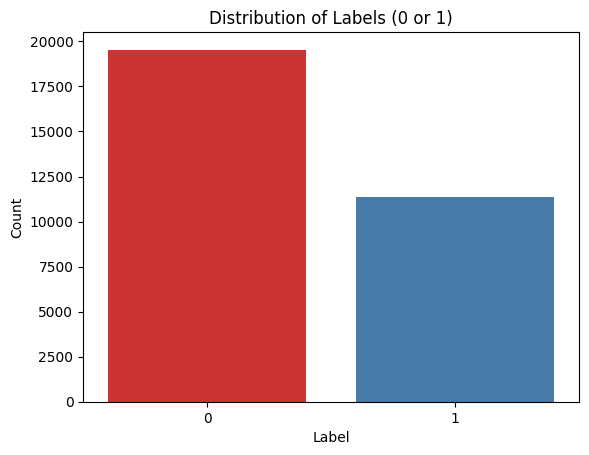

In [ ]:
# Uses seaborne to create a count plot of the occurrences of each label in the 'Label' column
counts = df['Label'].value_counts()

sns.countplot(x='Label', data=df, palette='Set1')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (0 or 1)')

(-0.5, 499.5, 299.5, -0.5)

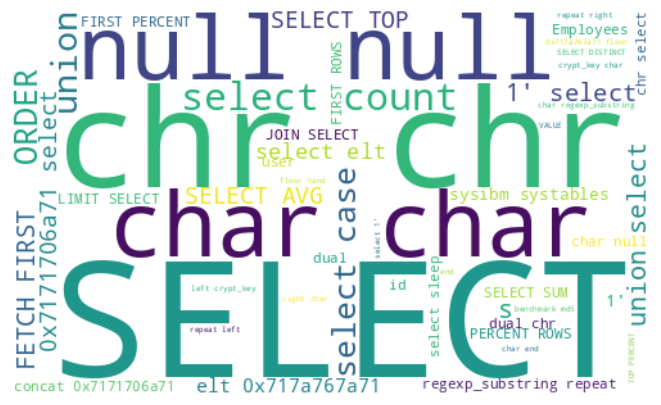

In [ ]:
# Uses WorldCloud to display a word cloud to visualize the most frequent words in the sentences.
from wordcloud import WordCloud

# Generates word cloud
wordcloud = WordCloud(width=500, height=300, max_words=50, background_color='white').generate(' '.join(df['Query']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

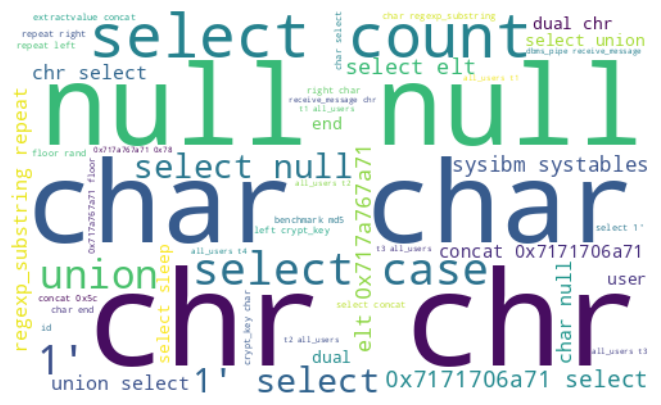

In [ ]:
# Displays a word cloud to visualize the most frequent words in label '1' entriess
# Filters the DataFrame for entries with Label '1'
filtered_df = df[df['Label'] == 1]

wordcloud = WordCloud(width=500, height=300, max_words=50, background_color='white').generate(' '.join(filtered_df['Query']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Frequency')

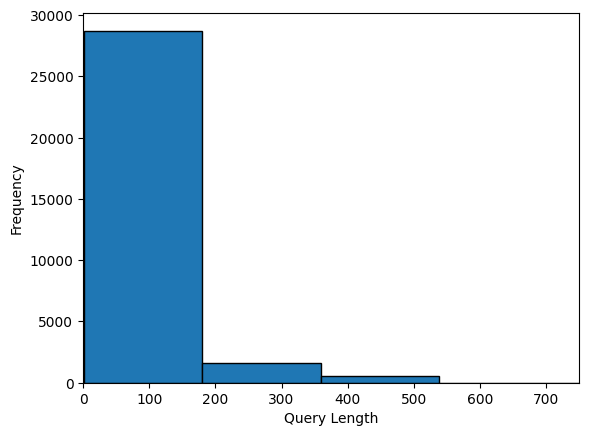

In [ ]:
# Uses historgram to visualize the distribution of sentence lengths
df['Query'].apply(len).plot(kind='hist', bins=30, edgecolor='black')

plt.xlim(0, 750)
plt.xlabel('Query Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Query Length')

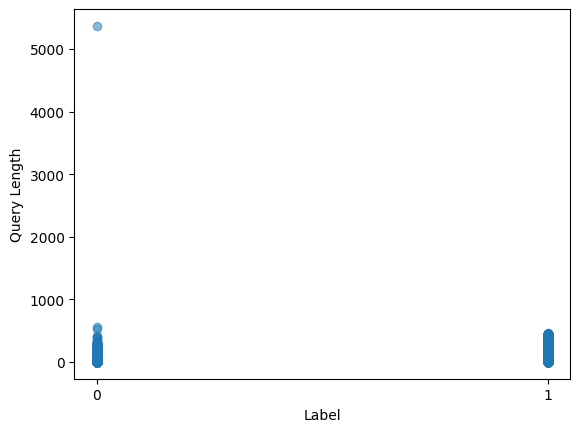

In [ ]:
# Create a scatter plot to visualize the distribution of sentence lengths
plt.scatter(df['Label'], df['Query'].apply(len), alpha=0.5)

plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Query Length')

# **Data processing for training and testing**
Data processing is an essential step in machine learning, where its objective is to improve the model's accuracy by removing any unexpected patterns, ensuring a more consistent and effective learning process. This approach is referred to as Exploratory Data Analysis (EDA for short), and includes investigating and processing tasks such as:


In [ ]:
# Randomly shuffles the rows of the DataFrame using the 'sample' method
df = df.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [ ]:
# Extracts the 'Query' column as the feature (X) and the 'Label' column as the label (y) from the DataFrame.
X = df['Query']
y = df['Label']

Convert the text data in the 'Query' column into a numerical format (a dense array) by creating a document-term matrix, which is essential for training machine learning models that require numerical input features.

In [ ]:
# Create a CountVectorizer with specified parameters
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))

# Apply the vectorizer to the 'Sentence' column and convert the result to a dense array
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

In [ ]:
# Transforms the dense array back to the original text
original_text = vectorizer.inverse_transform(X)

# Displays a sample of the original text
print(original_text[:5])  # Print the first 5 samples

[array(['0x7171706a71', '0x717a767a71', '1045', '1210', '3051', '5584',
       '5801', '7562', '8488', 'concat', 'count', 'elt', 'floor', 'group',
       'rand', 'row', 'select', 'union'], dtype='<U66'), array(['01', '07', '1996', '31', 'apple', 'scene', 'select'], dtype='<U66'), array(['ball', 'especially', 'fellow', 'insert', 'surrounded', 'values'],
      dtype='<U66'), array(['avg', 'construction', 'finally', 'instrument', 'select', 'sum'],
      dtype='<U66'), array(['65'], dtype='<U66')]


In [ ]:
# Displays a prettier sample of the original text
for i, sample in enumerate(original_text[:10]):  # Print the first 5 samples
    print(f"Sample {i+1}: {' '.join(sample)}\n")

Sample 1: 0x7171706a71 0x717a767a71 1045 1210 3051 5584 5801 7562 8488 concat count elt floor group rand row select union

Sample 2: 01 07 1996 31 apple scene select

Sample 3: ball especially fellow insert surrounded values

Sample 4: avg construction finally instrument select sum

Sample 5: 65

Sample 6: avg blew gold select stage sum

Sample 7: 5083 7142 select union

Sample 8: consonant grandfather living select

Sample 9: 

Sample 10: 7656



Now that the dataset has undergone processing and sanitization, we proceed to the subsequent phase, Data Splitting, where the dataset is divided into two subsets: one for training and one for testing.
  
Additionally, splitting the dataset into representative subsets allows us to form comprehensive insights of the model's performance, identifying potential challenges in biased behaviors. This approach helps prevent factors contributing to the model's poor performance, allowing for fine-tuning of hyperparameters and adjustments if necessary to enhance the model's confidence in real-world scenarios.

In [ ]:
# Split the data into training and testing sets (25% for testing)
X_train, X_test, y_train, y_test
    = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

In [ ]:
# Print dimension of the training and testing sets to console
print(X_train.shape)    #(23189, 6594)
print(y_train.shape)    #(23189,)
print(X_test.shape)     #(7730, 6594)
print(y_test.shape)     #(7730, 6594)

(23189, 6594)
(23189,)
(7730, 6594)
(7730,)


# **Model Training**

For our SQL injection detection models, several supervised learning algorithms might prove more effective in detecting patterns and relationships for Binary Classification. Commonly used algorithms for this type of classification model include [23]:



*   Naive Bayes
*   Logistic Regression
*   Decision Trees
*   K-Nearest Neighbors
*   Support Vector Machines
*   and Neural Networks

These algorithms excel in uncovering patterns and relationships within training data, enabling the model to accurately classify SQL queries as either indicative or not indicative of SQL injection. Additionally, to ensure a broader coverage, we also employ additional advanced algorithms such as LightGBM, XGBoost, etc., which we hope to be able to capture any underlying complex patterns in the training dataset.


**Logistic Regression**
*   Logistic Regression is a widely employed algorithm for Binary Classification problems, specifically designed to predict outcomes in scenarios where there is a linear relationship between the data and the label. Logistic regression uses its logistic function to predict binary outcomes, assigning each data point in either category based on the computed probability. When the calculated probability falls over a certain threshold, typically 0.5, the data instance is classified into one category; otherwise, another category if it falls below the specified threshold.


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print(f"Accuracy of Logistic Regression: {round(accuracy_score(y_pred_logreg, y_test), 2)}")
print(f"F1 Score of Logistic Regression: {round(f1_score(y_pred_logreg, y_test), 2)}")
print(f"Recall of Logistic Regression: {round(recall_score(y_pred_logreg, y_test), 2)}")
print(f"Precision Score of Logistic Regression: {round(precision_score(y_pred_logreg, y_test), 2)}")

Accuracy of Logistic Regression: 0.94
F1 Score of Logistic Regression: 0.91
Recall of Logistic Regression: 0.98
Precision Score of Logistic Regression: 0.85


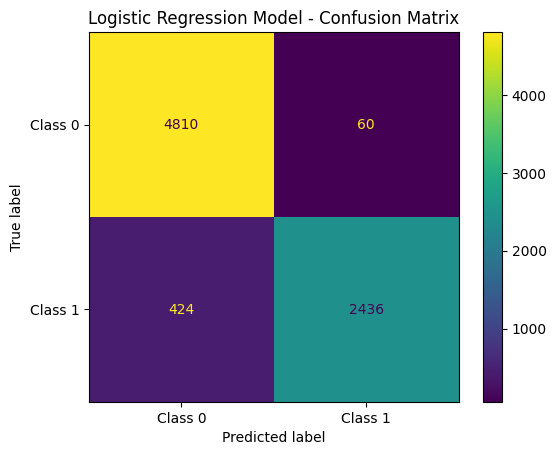

In [ ]:
cm = confusion_matrix(y_test, y_pred_logreg)

display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()

plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0", "Class 1"])
plt.yticks(range(2), ["Class 0", "Class 1"])
plt.show()



**Support Vector Machines (SVM)**

*   Support Vector Machines (or SVM for short) is another powerful algorithm that specializes in scenarios with high-dimensional spaces. It is designed for both classification and regression tasks, but particularly excels in binary classification problems. This is because SVM’s algorithm enables it to identify a clear margin between different labels within the training dataset, accomodating non-linear, complex and high-dimensional relationships where other algorithms might struggle.


In [ ]:
from sklearn.svm import SVC

svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(f"Accuracy of SVM: {round(accuracy_score(y_pred_svm, y_test), 2)}")
print(f"F1 Score of SVM: {round(f1_score(y_pred_svm, y_test), 2)}")
print(f"Recall of SVM: {round(recall_score(y_pred_svm, y_test), 2)}")
print(f"Precision Score of SVM: {round(precision_score(y_pred_svm, y_test), 2)}")

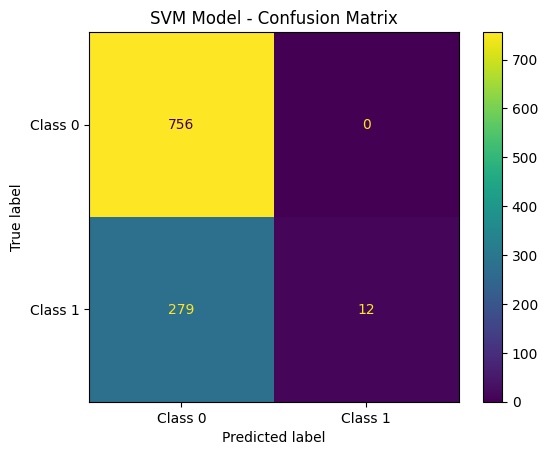

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

display_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
display_svm.plot()

plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0", "Class 1"])
plt.yticks(range(2), ["Class 0", "Class 1"])
plt.show()


**Naives Bayes**

*  Naive Bayes is a generative learning algorithm that operates under the assumption that the features of the dataset are conditionally dependent regardless of the given label. Essentially, it does not determine which features are most important to differentiate between labels, unlike discriminative learning algorithms.  Despite its simplicity and “naivety” in assumption, Naive Bayes classifier demonstrates remarkably high efficiency, particularly in handling classification tasks in real-time scenarios or resource-constrained environments.

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print(f"Accuracy of Naive Bayes: {round(accuracy_score(y_pred_nb, y_test), 2)}")
print(f"F1 Score of Naive Bayes: {round(f1_score(y_pred_nb, y_test), 2)}")
print(f"Recall of Naive Bayes: {round(recall_score(y_pred_nb, y_test), 2)}")
print(f"Precision Score of Naive Bayes: {round(precision_score(y_pred_nb, y_test), 2)}")

Accuracy of Naive Bayes: 0.82
F1 Score of Naive Bayes: 0.8
Recall of Naive Bayes: 0.68
Precision Score of Naive Bayes: 0.99


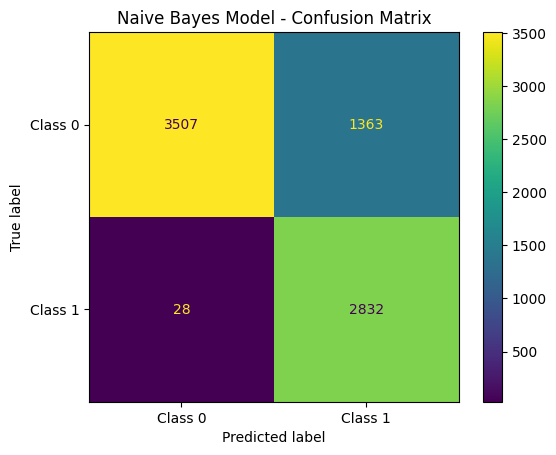

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

display_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
display_nb.plot()

plt.title("Naive Bayes Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0", "Class 1"])
plt.yticks(range(2), ["Class 0", "Class 1"])
plt.show()


**XGBoost**
* XGBoost, abbreviated from  Extreme Gradient Boosting, is one of the more advanced machine learning algorithms, highly effective in constructing a robust model by amalgamating predictions from multiple weak learners. By doing so, XGBoost can eliminate the weaknesses of individual models , such as decision trees, by focusing on the correction of errors, minimizing the overall prediction error.


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(f"Accuracy of XGBoost: {round(accuracy_score(y_pred_xgb, y_test), 2)}")
print(f"F1 Score of XGBoost: {round(f1_score(y_pred_xgb, y_test), 2)}")
print(f"Recall of XGBoost: {round(recall_score(y_pred_xgb, y_test), 2)}")
print(f"Precision Score of XGBoost: {round(precision_score(y_pred_xgb, y_test), 2)}")

Accuracy of XGBoost: 0.94
F1 Score of XGBoost: 0.91
Recall of XGBoost: 0.97
Precision Score of XGBoost: 0.86


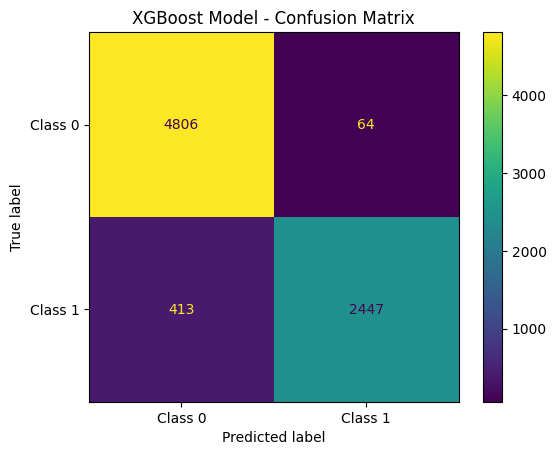

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

display_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
display_xgb.plot()

plt.title("XGBoost Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0", "Class 1"])
plt.yticks(range(2), ["Class 0", "Class 1"])
plt.show()

**LightGBM**

*  LightGBM is another advanced gradient boosting framework, specifically designed to handle large and high-dimensional datasets. LightGBM utilizes histogram-based learning, which accelerates up the training process by grouping continuous feature values. Additionally, it also employs a leaf-wise tree growth strategy, prioritizing splits that lead to more significant reductions in prediction errors.


In [ ]:
import lightgbm as lgbm

lgbm_clf = lgbm.LGBMClassifier(verbose=-1)
lgbm_clf.fit(X_train, y_train)
y_pred_lgbm = lgbm_clf.predict(X_test)

print(f"Accuracy of LightGBM: {round(accuracy_score(y_pred_lgbm, y_test), 2)}")
print(f"F1 Score of LightGBM: {round(f1_score(y_pred_lgbm, y_test), 2)}")
print(f"Recall of LightGBM: {round(recall_score(y_pred_lgbm, y_test), 2)}")
print(f"Precision Score of LightGBM: {round(precision_score(y_pred_lgbm, y_test), 2)}")

Accuracy of LightGBM: 0.94
F1 Score of LightGBM: 0.91
Recall of LightGBM: 0.98
Precision Score of LightGBM: 0.85


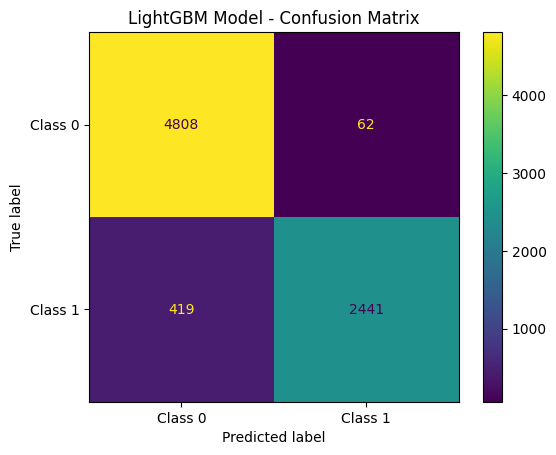

In [ ]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

display_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm)
display_lgbm.plot()

plt.title("LightGBM Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0", "Class 1"])
plt.yticks(range(2), ["Class 0", "Class 1"])
plt.show()

**K-Nearest Neighbor (KNN)**
* K-Nearest Neighbor ( or KNN for short) is also another uncomplicated yet intuitive algorithm that categorizes data points and determines its label based on the local patterns of other similar data points, or nearest neighbors. The k- variable determines the number of nearest neighbors that should be taken into account when evaluating each data point. While offering simplicity and efficiency, K-Nearest Neighbor can also be rather computationally expensive as it requires memory to store all the training data.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(f"Accuracy of K-Nearest Neighbor: {round(accuracy_score(y_pred_knn, y_test), 2)}")
print(f"F1 Score of K-Nearest Neighbo: {round(f1_score(y_pred_knn, y_test), 2)}")
print(f"Recall of K-Nearest Neighbo: {round(recall_score(y_pred_knn, y_test), 2)}")
print(f"Precision Score of K-Nearest Neighbo: {round(precision_score(y_pred_knn, y_test), 2)}")


Accuracy of K-Nearest Neighbor: 0.84
F1 Score of K-Nearest Neighbo: 0.81
Recall of K-Nearest Neighbo: 0.75
Precision Score of K-Nearest Neighbo: 0.88


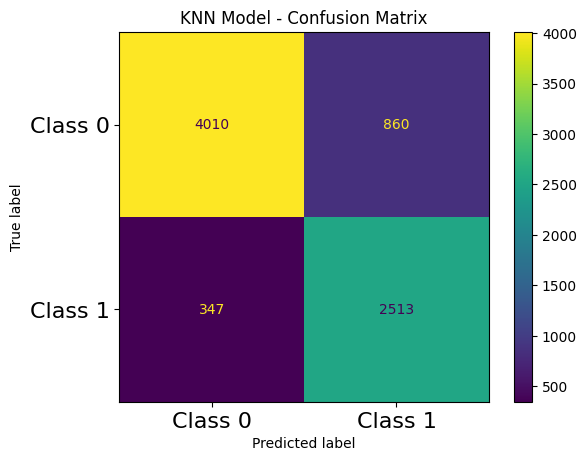

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

display_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
display_knn.plot()

plt.title("KNN Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0", "Class 1"], fontsize=16)
plt.yticks(range(2), ["Class 0", "Class 1"], fontsize=16)
plt.show()

**Random Forest**

* Random Forest, or Random Decision Forest, is a popular ensemble method with robust perfomance used for classification, regression and various other machine learning tasks. It  achieves better diversity by training multiple decision trees on different subsets within the training dataset, then determines the final prediction by aggregating the results from these trees using a voting mechanism. This approach allows Random Forest to enhance the model's generalization capabilities and mitigates the risk of overfitting that individual trees might encounter. [28]




In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f"Accuracy of Random Forest: {round(accuracy_score(y_pred_rf, y_test), 2)}")
print(f"F1 Score of Random Forest: {round(f1_score(y_pred_rf, y_test), 2)}")
print(f"Recall of Random Forest: {round(recall_score(y_pred_rf, y_test), 2)}")
print(f"Precision Score of Random Forest: {round(precision_score(y_pred_rf, y_test), 2)}")

Accuracy of Random Forest: 0.93
F1 Score of Random Forest: 0.9
Recall of Random Forest: 0.91
Precision Score of Random Forest: 0.89


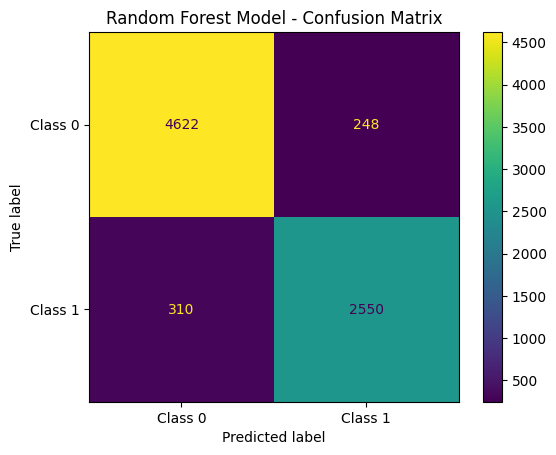

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

display_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
display_rf.plot()

plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0", "Class 1"])
plt.yticks(range(2), ["Class 0", "Class 1"])
plt.show()

**Decision Tree**

*       Decision trees can model complex relationships and are capable of capturing non-linear patterns in the data.
*   They can be prone to overfitting, so consider using ensemble methods like Random Forests to mitigate this issue.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Accuracy of Decision Tree: {round(accuracy_score(y_pred_dt, y_test), 2)}")
print(f"F1 Score of Decision Tree: {round(f1_score(y_pred_dt, y_test), 2)}")
print(f"Recall of Decision Tree: {round(recall_score(y_pred_dt, y_test), 2)}")
print(f"Precision Score of Decision Tree: {round(precision_score(y_pred_dt, y_test), 2)}")

Accuracy of Decision Tree: 0.92
F1 Score of Decision Tree: 0.89
Recall of Decision Tree: 0.88
Precision Score of Decision Tree: 0.9


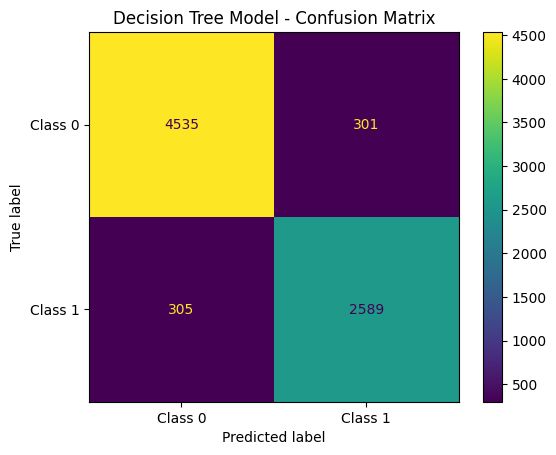

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

display_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
display_dt.plot()
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0", "Class 1"])
plt.yticks(range(2), ["Class 0", "Class 1"])
plt.show()

** Neural Network**
Neural Network excels at capturing both linear and nonlinear patterns, allowing it to model intricate and complex relationships within the training data. However, it can be susceptible to overfitting, particularly when dealing with limited data or complex architectures. Regularization techniques such as dropout or L2 regularization can be employed to address this biased behavior when training the model. Additionally, similar to Decision Tree and Random Forest, ensemble methods such as model averaging or stacking should also be considered in order to enhance generalization.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple neural network model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions using the trained model
y_pred_nn = (model.predict(X_test) > 0.5).astype(int).flatten()

print(f"Accuracy of Neural Network: {round(accuracy_score(y_pred_nn, y_test), 2)}")
print(f"F1 Score of Neural Network: {round(f1_score(y_pred_nn, y_test), 2)}")
print(f"Recall of Neural Network: {round(recall_score(y_pred_nn, y_test), 2)}")
print(f"Precision Score of Neural Network: {round(precision_score(y_pred_nn, y_test), 2)}")

Epoch 1/10
725/725 [==============================] - 12s 15ms/step - loss: 0.1815 - accuracy: 0.9323 - val_loss: 0.1470 - val_accuracy: 0.9629
Epoch 2/10
725/725 [==============================] - 11s 15ms/step - loss: 0.0691 - accuracy: 0.9788 - val_loss: 0.1593 - val_accuracy: 0.9627
Epoch 3/10
725/725 [==============================] - 11s 15ms/step - loss: 0.0615 - accuracy: 0.9806 - val_loss: 0.1563 - val_accuracy: 0.9633
Epoch 4/10
725/725 [==============================] - 11s 15ms/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.1521 - val_accuracy: 0.9635
Epoch 5/10
725/725 [==============================] - 11s 16ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.1565 - val_accuracy: 0.9631
Epoch 6/10
725/725 [==============================] - 9s 13ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.1622 - val_accuracy: 0.9636
Epoch 7/10
725/725 [==============================] - 12s 16ms/step - loss: 0.0543 - accuracy: 0.9832 - val_loss: 0.1628 - val_accuracy: 

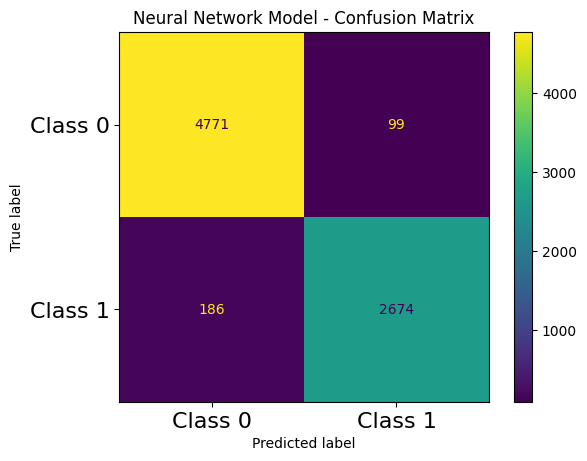

In [ ]:
cm_nn = confusion_matrix(y_test, y_pred_nn)

display_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
display_nn.plot()

plt.title("Neural Network Model - Confusion Matrix")
plt.xticks(range(2), ["Class 0", "Class 1"], fontsize=16)
plt.yticks(range(2), ["Class 0", "Class 1"], fontsize=16)
plt.show()

# **Model Evaluation**
When evaluating the models’ performance, we use the following quantitative assessing metrics: accuracy, precision, recall and F1 score.  In general, the overall consensus is that higher scores across these metrics indicate a more effective and well-performing model. [29]


**ROC Curve**

ROC ( Receiver Operating Characteristic) curve displays the relationship between true positive rate and false positive rate across different threshold values, providing a visual assessment of a model's performance.

The AUC (Area Under the ROC Curve) is a numerical measure of the ROC curve's performance. The higher AUC score indicates a better ability of the model to distinguish between positive and negative instances, with a perfect classifier having an AUC of 1.0.


In [ ]:
# Declaring an array of prediction arrays for each model, and a list of model names.

models_predictions = [
    (y_pred_logreg, 'LogReg'),
    (y_pred_nb, 'NaiveBayes'),
    (y_pred_xgb, 'XGBoost'),
    (y_pred_lgbm, 'LightGBM'),
    (y_pred_rf, 'RanForest'),
    (y_pred_knn, 'KNN'),
    (y_pred_dt, 'DecisionTR'),
    (y_pred_nn, 'NeuralNet')
    #(y_pred_svm, 'Support Vector Machine'),
]

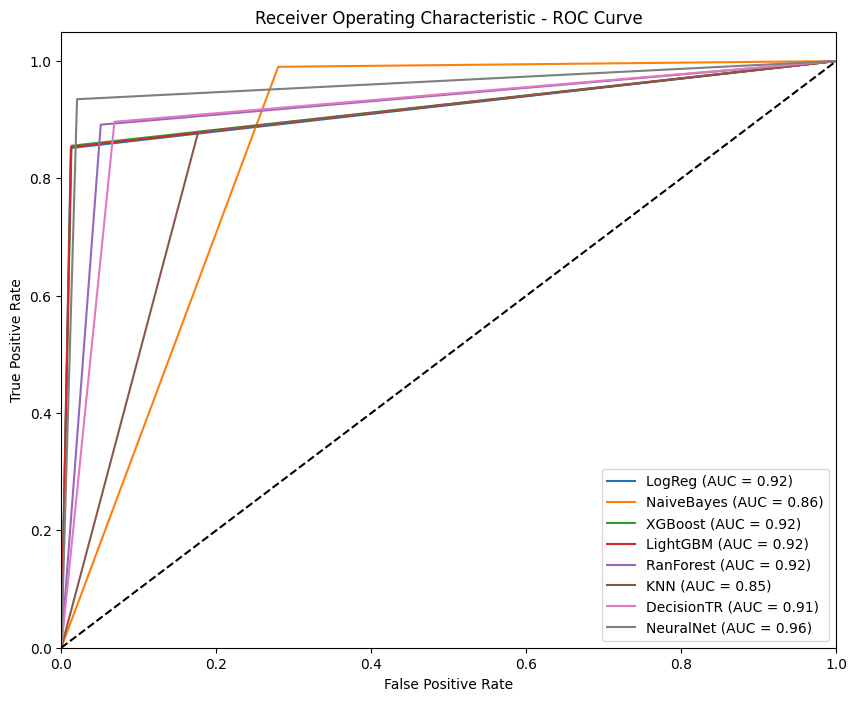

In [ ]:
from sklearn.metrics import roc_curve, auc

def calculate_roc_auc(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score, model_name

results = []

for y_pred, model_name in models_predictions:
    fpr, tpr, auc_score, model_name = calculate_roc_auc(y_test, y_pred, model_name)
    results.append((fpr, tpr, auc_score, model_name))

plt.figure(figsize=(10, 8))

for fpr, tpr, auc_score, model_name in results:
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC Curve')
plt.legend(loc='lower right')
plt.show()

**F-1 Score**

F1 score is the harmonic mean of precision and recall.

It is particularly useful when there is an uneven class distribution, with a higher F1 score indicating a better balance between precision and recall.



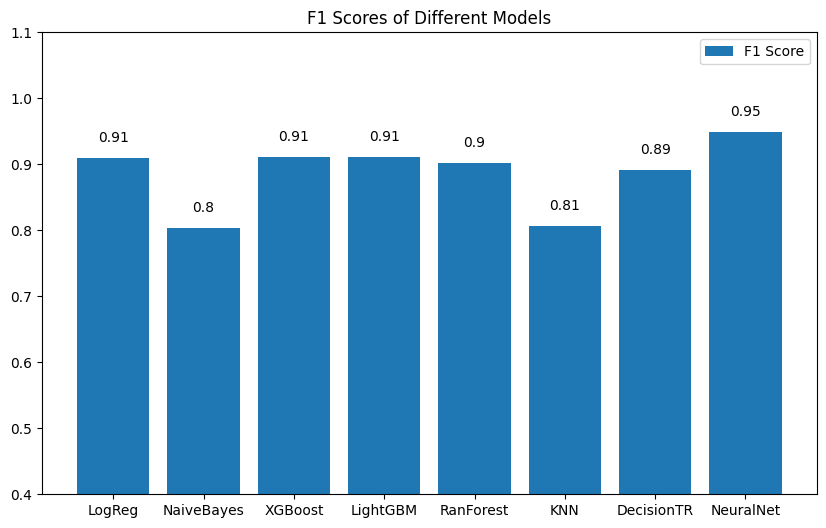

In [ ]:
# Bar plot with F1 scores and corresponding y_pred values
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models_predictions))

# Calculate F1 scores for each model
f1_scores = [f1_score(y_test, y_pred) for y_pred, _ in models_predictions]

# Plot F1 scores
plt.bar(index, f1_scores, label='F1 Score')

# Display exact F1 score values on the bars
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

#plt.xlabel('Models')
#plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models')
plt.ylim([0.4, 1.1])
plt.xticks(index, [model_name for _, model_name in models_predictions], ha='center')
plt.legend()
plt.show()


**Precision**

Precision is the ratio of correctly predicted positives to the total predicted positives. A high precision score indicates that the model was able to predict more relevant instances than irrelevant ones.


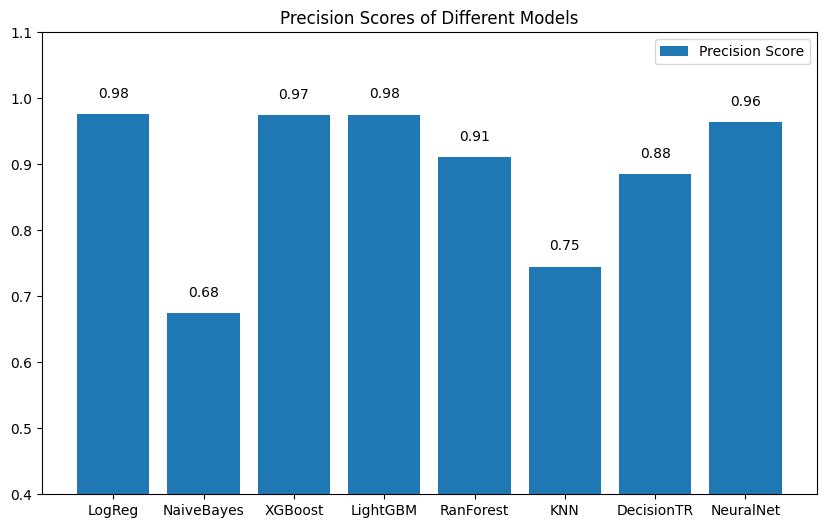

In [ ]:
from sklearn.metrics import precision_score

# Bar plot with Precision scores and corresponding y_pred values
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models_predictions))

# Calculate Precision scores for each model
precision_scores = [precision_score(y_test, y_pred) for y_pred, _ in models_predictions]

# Plot Precision scores
plt.bar(index, precision_scores, label='Precision Score')

# Display exact Precision score values on the bars
for i, v in enumerate(precision_scores):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

#plt.xlabel('Models')
#plt.ylabel('Precision Score')
plt.title('Precision Scores of Different Models')
plt.ylim([0.4, 1.1])
plt.xticks(index, [model_name for _, model_name in models_predictions], ha='center')
plt.legend()
plt.show()


**Accuracy**

Accuracy is the ratio of correctly predicted instances to the total number of instances in a dataset.

A higher accuracy score indicates better overall correctness, reflecting the model's ability to make accurate predictions across the entire dataset.


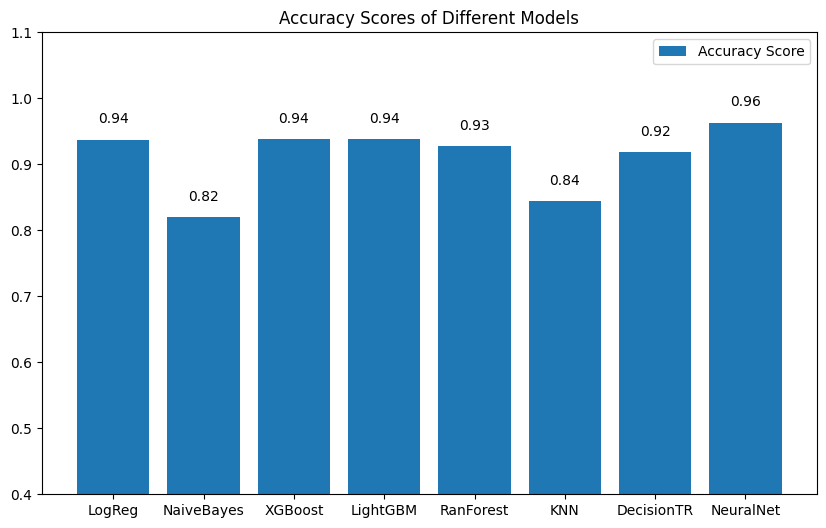

In [ ]:
from sklearn.metrics import accuracy_score

# Bar plot with Accuracy scores and corresponding y_pred values
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models_predictions))

# Calculate Accuracy scores for each model
accuracy_scores = [accuracy_score(y_test, y_pred) for y_pred, _ in models_predictions]

# Plot Accuracy scores
plt.bar(index, accuracy_scores, label='Accuracy Score')

# Display exact Accuracy score values on the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

#plt.xlabel('Models')
#plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylim([0.4, 1.1])
plt.xticks(index, [model_name for _, model_name in models_predictions], ha='center')
plt.legend()
plt.show()


**Recall**

Recall is the ratio of true positives to the sum of true positives and false negatives. Higher recall score indicates that a model is able to correctly identify all relevant instances from the dataset more than irrelevant ones.


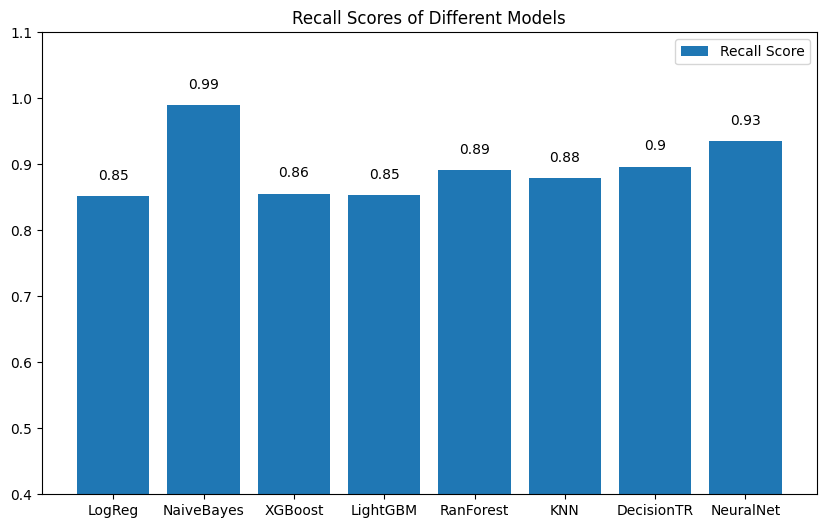

In [ ]:
from sklearn.metrics import recall_score

# Bar plot with Recall scores and corresponding y_pred values
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models_predictions))

# Calculate Recall scores for each model
recall_scores = [recall_score(y_test, y_pred) for y_pred, _ in models_predictions]

# Plot Recall scores
plt.bar(index, recall_scores, label='Recall Score')

# Display exact Recall score values on the bars
for i, v in enumerate(recall_scores):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.title('Recall Scores of Different Models')
plt.ylim([0.4, 1.1])
plt.xticks(index, [model_name for _, model_name in models_predictions], ha='center')
plt.legend()
plt.show()
